# **Basics of Knowledge Graphs**
##### Web Based Systems 2025, [FCSE](https://finki.ukim.mk/)

## Requirements

In [1]:
import requests
import urllib

import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from rdflib import Graph, URIRef, Literal
from rdflib.namespace import RDFS, FOAF, RDF
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph
from random import sample

## Exploring RDF with Python

We will begin by covering the fundamentals of working with knowledge graphs in Python using `rdflib`. We will then explore how to convert an `rdflib` graph into formats compatible with other graph libraries.

We will use DBpedia as our knowledge base. Through HTTP content negotiation, we will retrieve subsets of DBpedia data in the desired formats (such as RDF/XML, Turtle, and JSON-LD) and perform basic graph navigation and analysis.

In [2]:
url = "http://dbpedia.org/resource/Skopje"
headers = {"Accept": "application/ld+json"}

Send an HTTP request to DBpedia to retrieve the knowledge graph for *Skopje* in JSON-LD format. In this case, content negotiation is performed explicitly by setting the `Accept` header.

In [3]:
r = requests.get(url, headers=headers)
result = r.json()

The result is a context-aware multigraph.

*Note: A multigraph is a type of graph that allows multiple edges between the same pair of vertices (parallel edges) and edges that connect a vertex to itself (loops).*

In [4]:
str(result)[:2000]

"{'@context': {'mayHighC': {'@id': 'http://dbpedia.org/property/mayHighC'}, 'octHighC': {'@id': 'http://dbpedia.org/property/octHighC'}, 'yearSnowDays': {'@id': 'http://dbpedia.org/property/yearSnowDays'}, 'sameAs': {'@id': 'http://www.w3.org/2002/07/owl#sameAs', '@type': '@id'}, 'areaTotal': {'@id': 'http://dbpedia.org/ontology/PopulatedPlace/areaTotal', '@type': 'http://dbpedia.org/datatype/squareKilometre'}, 'julRecordHighC': {'@id': 'http://dbpedia.org/property/julRecordHighC'}, 'long': {'@id': 'http://www.w3.org/2003/01/geo/wgs84_pos#long'}, 'lat': {'@id': 'http://www.w3.org/2003/01/geo/wgs84_pos#lat'}, 'date': {'@id': 'http://dbpedia.org/property/date'}, 'janMeanC': {'@id': 'http://dbpedia.org/property/janMeanC'}, 'pushpinRelief': {'@id': 'http://dbpedia.org/property/pushpinRelief'}, 'augSun': {'@id': 'http://dbpedia.org/property/augSun'}, 'timezone': {'@id': 'http://dbpedia.org/property/timezone', '@type': '@id'}, 'novPrecipitationMm': {'@id': 'http://dbpedia.org/property/novPre

In [5]:
result.keys()

dict_keys(['@context', '@graph'])

The `result` variable is a dictionary containing two key-value pairs. The key of interest is `@graph`, whose value is a list of length one; therefore, we access its contents using index `0`. The `attributes` variable then represents a dictionary consisting of key-value pairs in this example.

In [6]:
len(result["@graph"])

1

In [7]:
attributes = result["@graph"][0]

We can print out the content of the `attributes` dictionary.

In [8]:
str(attributes)[:2000]

"{'@id': 'http://dbpedia.org/resource/Skopje', '@type': ['http://www.w3.org/2002/07/owl#Thing', 'http://www.wikidata.org/entity/Q486972', 'http://www.wikidata.org/entity/Q515', 'http://www.w3.org/2003/01/geo/wgs84_pos#SpatialThing', 'http://schema.org/City', 'http://schema.org/Place', 'http://dbpedia.org/ontology/Settlement', 'http://dbpedia.org/ontology/PopulatedPlace', 'http://dbpedia.org/ontology/Location', 'http://dbpedia.org/ontology/Place'], 'seeAlso': ['http://dbpedia.org/resource/List_of_names_of_European_cities_in_different_languages', 'http://dbpedia.org/resource/Sister_city', 'http://dbpedia.org/resource/Lists_of_twin_towns_and_sister_cities', 'http://dbpedia.org/resource/North_Macedonia', 'http://dbpedia.org/resource/Different_languages:_Q-T'], 'sameAs': ['http://viaf.org/viaf/125800534', 'http://rdf.freebase.com/ns/m.07bbc', 'http://sw.cyc.com/concept/Mx4rvVj-GZwpEbGdrcN5Y29ycA', 'http://linkedgeodata.org/triplify/node170792214', 'http://sws.geonames.org/785842/', 'http://

The dictionary keys correspond to the relation types associated with the retrieved resource (*Skopje*).

In [9]:
attributes.keys()

dict_keys(['@id', '@type', 'seeAlso', 'sameAs', 'name', 'label', 'homepage', 'exactMatch', 'lat', 'long', 'depiction', 'wasDerivedFrom', 'point', 'subject', 'isPrimaryTopicOf', 'sameAs@id', 'mapsize', 'demographics1Info', 'demographics1Title', 'demographicsType', 'demonym', 'imageFlag', 'elevation', 'elevationM', 'center', 'flagLink', 'isoCode', 'sepLowC', 'febHumidity', 'novLowC', 'janRecordHighC', 'junLowC', 'octRecordLowC', 'augHighC', 'junRecordHighC', 'janHighC', 'aprSun', 'aprRecordHighC', 'decRecordHighC', 'aprRecordLowC', 'augHumidity', 'novHighC', 'mayHumidity', 'julMeanC', 'sepHighC', 'febSun', 'marHighC', 'julRecordLowC', 'novRecordHighC', 'decHighC', 'marHumidity', 'febRecordLowC', 'junHighC', 'sepMeanC', 'marSun', 'julHighC', 'novHumidity', 'febRecordHighC', 'novSun', 'augLowC', 'julHumidity', 'octMeanC', 'mayRecordLowC', 'janSun', 'decSun', 'junHumidity', 'junSun', 'octHumidity', 'marLowC', 'decRecordLowC', 'yearRecordHighC', 'sepHumidity', 'julRecordHighC', 'sepSun', 'ye

We can select specific properties of the resource *Skopje* based on the RDF predicates defined in the graph.

In [10]:
lat = attributes.get("lat")
long = attributes.get("long")

In [11]:
lat, long

(41.99611282348633, 21.43166732788086)

Some attributes can be harder to parse, because they are not simple values.

In [12]:
attributes["name"]

[{'@value': 'Skopje', '@language': 'en'},
 {'@value': 'City of Skopje', '@language': 'en'},
 {'@value': 'Град Скопје', '@language': 'en'},
 {'@value': 'Qyteti i Shkupit', '@language': 'en'}]

In [13]:
name = attributes["name"][0]["@value"]

In [14]:
print("City:", name)
print("Latitude:", lat)
print("Longitude:", long)

City: Skopje
Latitude: 41.99611282348633
Longitude: 21.43166732788086


## Manipulating RDF with RDFLib

Next, we'll see how we can use *RDFLib* for manipulating RDF. *RDFLib* is to Python what *Apache Jena* is to Java.

We create a new `Graph` and load the content referenced by the `url` variable. Calling the `parse()` method issues an HTTP GET request to retrieve the RDF data for the resource. This works through implicit content negotiation, which is handled automatically by the method.

In [15]:
url

'http://dbpedia.org/resource/Skopje'

In [16]:
g = Graph()
g.parse(url)

<Graph identifier=Nea7f8fa7993541a1b61371340bda00e3 (<class 'rdflib.graph.Graph'>)>

The `parse` method accepts a `format` parameter, allowing us to specify the desired format for loading the graph.

**Example:**

```python
g.parse(url, format="xml")
```

RDFLib graphs are unordered containers. They support standard Python set operations (e.g., `add()` to insert a triple) and provide methods for searching triples, which return results in arbitrary order.

Triples in an RDFLib graph are represented as a list of tuples:

```python
[
    (subject0, predicate0, object0),
    (subject1, predicate1, object1),
    ...
    (subjectN, predicateN, objectN)
]
```

In [17]:
print(f"Initial length: {len(g)}")

Initial length: 1224


## Navigating a Knowledge Graph

The knowledge graph is a collection object which can be iterated. When doing so, we get a triplet containing the subject, predicate and object values for each triplet in the graph.

In [18]:
for s, p, o in g:
    print(s, p, o)

http://dbpedia.org/resource/Skopje http://dbpedia.org/property/south http://dbpedia.org/resource/Sopište_Municipality
http://dbpedia.org/resource/Skopje http://dbpedia.org/property/quote 395
http://dbpedia.org/resource/Skopje http://dbpedia.org/property/julPrecipitationDays 7
http://dbpedia.org/resource/Skopje http://dbpedia.org/property/quote 1004
http://dbpedia.org/resource/Skopje http://dbpedia.org/ontology/wikiPageWikiLink http://dbpedia.org/resource/Category:Cities_in_North_Macedonia
http://dbpedia.org/resource/Skopje http://dbpedia.org/ontology/wikiPageWikiLink http://dbpedia.org/resource/Rumelia
http://dbpedia.org/resource/Skopje http://dbpedia.org/ontology/wikiPageWikiLink http://dbpedia.org/resource/File:Prvomajska_proslava_vo_Skopje,_1909.jpg
http://dbpedia.org/resource/Skopje http://dbpedia.org/ontology/wikiPageWikiLink http://dbpedia.org/resource/Adolf_Ciborowski
http://dbpedia.org/resource/Skopje http://dbpedia.org/ontology/wikiPageWikiLink http://dbpedia.org/resource/Gorn

We can create two new entities: one representing *Skopje* and another representing *FINKI*. We define a new predicate to represent a `dbo:location` relationship. Additionally, we create a literal containing the full title of FINKI and set the type of the FINKI node to `FOAF.Organization`.

In [19]:
skopje = URIRef(url)  # resource
finki = URIRef("http://finki.ukim.mk/")  # resource
location = URIRef("http://dbpedia.org/ontology/location")  # property
name = Literal("Faculty of Computer Science and Engineering, Skopje")  # literal

Next, we create three RDF statements (triples):

1. The first triple indicates that FINKI is an organization.
2. The second triple specifies Skopje as the location of FINKI.
3. The third triple assigns the name to the FINKI entity.


In [20]:
g.add((finki, RDF.type, FOAF.Organization))
g.add((finki, location, skopje))
g.add((finki, RDFS.label, name))

<Graph identifier=Nea7f8fa7993541a1b61371340bda00e3 (<class 'rdflib.graph.Graph'>)>

Next, we check the number of triples in the graph, after the adding new RDF triples.

In [21]:
print("New length:", len(g))

New length: 1227


We can print the entire graph in Turtle syntax using the `serialize` method. By specifying the `destination` parameter, we can save the graph to the given file path in the specified `format`.

In [22]:
print(g.serialize(format="turtle", destination="skopje.ttl"))

[a rdfg:Graph;rdflib:storage [a rdflib:Store;rdfs:label 'Memory']].


We can traverse all RDF triples with the `?s rdfs:label ?o` triple pattern.

In [23]:
for s, p, o in g.triples((None, RDFS.label, None)):
    print(s, p, o)

http://dbpedia.org/resource/Skopje http://www.w3.org/2000/01/rdf-schema#label 斯科普里
http://dbpedia.org/resource/Skopje http://www.w3.org/2000/01/rdf-schema#label Scóipé
http://dbpedia.org/resource/Skopje http://www.w3.org/2000/01/rdf-schema#label Skopje
http://dbpedia.org/resource/Skopje http://www.w3.org/2000/01/rdf-schema#label Skopje
http://dbpedia.org/resource/Skopje http://www.w3.org/2000/01/rdf-schema#label Skopje
http://dbpedia.org/resource/Skopje http://www.w3.org/2000/01/rdf-schema#label Skopje
http://dbpedia.org/resource/Skopje http://www.w3.org/2000/01/rdf-schema#label Skopje
http://dbpedia.org/resource/Skopje http://www.w3.org/2000/01/rdf-schema#label Skopje
http://dbpedia.org/resource/Skopje http://www.w3.org/2000/01/rdf-schema#label Skopje
http://dbpedia.org/resource/Skopje http://www.w3.org/2000/01/rdf-schema#label Skopje
http://dbpedia.org/resource/Skopje http://www.w3.org/2000/01/rdf-schema#label Skopje
http://dbpedia.org/resource/Skopje http://www.w3.org/2000/01/rdf-sc

We can traverse all subjects that have an `RDF.type` of `FOAF.Organization`.

In [24]:
for org in g.subjects(RDF.type, FOAF.Organization):
    print(org)

http://finki.ukim.mk/


We can select all `?p` predicates, using the `?s ?p ?o` triple pattern.

In [25]:
predicates = g.predicates(subject=None, object=None)
for predicate in predicates:
    print(predicate)

http://dbpedia.org/property/south
http://dbpedia.org/property/quote
http://dbpedia.org/property/julPrecipitationDays
http://dbpedia.org/property/quote
http://dbpedia.org/ontology/wikiPageWikiLink
http://dbpedia.org/ontology/wikiPageWikiLink
http://dbpedia.org/ontology/wikiPageWikiLink
http://dbpedia.org/ontology/wikiPageWikiLink
http://dbpedia.org/ontology/wikiPageWikiLink
http://xmlns.com/foaf/0.1/depiction
http://dbpedia.org/property/wikiPageUsesTemplate
http://www.w3.org/2000/01/rdf-schema#label
http://dbpedia.org/property/blankNameSec
http://dbpedia.org/ontology/description
http://www.w3.org/2002/07/owl#sameAs
http://dbpedia.org/ontology/wikiPageWikiLink
http://dbpedia.org/ontology/wikiPageWikiLink
http://www.w3.org/2002/07/owl#sameAs
http://dbpedia.org/property/augHighC
http://dbpedia.org/ontology/wikiPageWikiLink
http://dbpedia.org/ontology/wikiPageExternalLink
http://dbpedia.org/ontology/wikiPageWikiLink
http://www.w3.org/2002/07/owl#sameAs
http://dbpedia.org/property/settlement

We can retrieve a specific value from the graph by specifying both the subject and the predicate.

In [26]:
name = g.value(subject=finki, predicate=RDFS.label)
print("Full name of FINKI:", name)

Full name of FINKI: Faculty of Computer Science and Engineering, Skopje


We can retrieve a set of values (objects) from the graph by specifying a subject and a predicate.

In [27]:
names = g.objects(subject=skopje, predicate=FOAF.name)
print("All name variants of Skopje:")
for name in names:
    print("\t - ", name)

All name variants of Skopje:
	 -  Skopje
	 -  City of Skopje
	 -  Град Скопје
	 -  Qyteti i Shkupit


## Querying DBpedia Graph with SPARQL

Here we'll see how we can use standard data analytics over RDF data, via *Pandas*. Pandas is a library for data manipulation and analysis, especially useful for tabular data.

In [28]:
query = """
SELECT ?company ?numEmployees ?revenue ?name ?wikipage ?industry
WHERE {
    ?company dbo:industry ?industry ;
             dbo:numberOfEmployees ?numEmployees ;
             dbo:revenue ?revenue ;
             foaf:name ?name ;
             foaf:isPrimaryTopicOf ?wikipage .
    FILTER (?numEmployees > 10000 && ?numEmployees < 200000)
    FILTER (xsd:integer(?revenue) > 500000 &&
            xsd:integer(?revenue) < 100000000000)
}
"""

In [29]:
endpoint = "http://dbpedia.org/sparql"
params = {
    "default-graph-uri": "http://dbpedia.org",
    "query": query,
    "format": "text/csv",
}

We encode the URL and provide the parameters.

In [30]:
param = urllib.parse.urlencode(params)

In [31]:
param

'default-graph-uri=http%3A%2F%2Fdbpedia.org&query=%0ASELECT+%3Fcompany+%3FnumEmployees+%3Frevenue+%3Fname+%3Fwikipage+%3Findustry%0AWHERE+%7B%0A++++%3Fcompany+dbo%3Aindustry+%3Findustry+%3B%0A+++++++++++++dbo%3AnumberOfEmployees+%3FnumEmployees+%3B%0A+++++++++++++dbo%3Arevenue+%3Frevenue+%3B%0A+++++++++++++foaf%3Aname+%3Fname+%3B%0A+++++++++++++foaf%3AisPrimaryTopicOf+%3Fwikipage+.%0A++++FILTER+%28%3FnumEmployees+%3E+10000+%26%26+%3FnumEmployees+%3C+200000%29%0A++++FILTER+%28xsd%3Ainteger%28%3Frevenue%29+%3E+500000+%26%26%0A++++++++++++xsd%3Ainteger%28%3Frevenue%29+%3C+100000000000%29%0A%7D%0A&format=text%2Fcsv'

We read the data from the SPARQL endpoint using it as a REST service. The data is returned in CSV, through implicit content negotiation, and is loaded directly using Pandas.

In [32]:
data = pd.read_csv(endpoint + "?" + param)

In [33]:
data.head()

,company,numEmployees,revenue,name,wikipage,industry
0,http://dbpedia.org/resource/Arçelik,55000,1.328000e+10,Arçelik A.Ş.,http://en.wikipedia.org/wiki/Arçelik,http://dbpedia.org/resource/Home_appliance
1,http://dbpedia.org/resource/Arçelik,55000,1.328000e+10,Arçelik A.Ş.,http://en.wikipedia.org/wiki/Arçelik,http://dbpedia.org/resource/Consumer_electronics
2,http://dbpedia.org/resource/Legrand_(company),38000,8.420000e+09,Legrand S.A.,http://en.wikipedia.org/wiki/Legrand_(company),http://dbpedia.org/resource/Electrical_device
3,http://dbpedia.org/resource/Legrand_(company),38000,8.420000e+09,Legrand S.A.,http://en.wikipedia.org/wiki/Legrand_(company),http://dbpedia.org/resource/Networking_hardware
4,http://dbpedia.org/resource/Mitsui_Sumitomo_In...,20237,2.137603e+06,"Mitsui Sumitomo Insurance Group Holdings, Inc.",http://en.wikipedia.org/wiki/Mitsui_Sumitomo_I...,http://dbpedia.org/resource/Insurance


In [34]:
len(data)

2091

Some companies may have multiple values for `revenue` or `number of employees`, so we need to remove all duplicates.

In [35]:
data = data.drop_duplicates(subset="company")

In [36]:
len(data)

1433

In [37]:
data.describe()

,numEmployees,revenue
count,1433.000000,1.433000e+03
mean,37020.430565,1.420397e+10
std,32855.858881,1.770426e+10
min,10037.000000,5.471640e+05
25%,15000.000000,3.400000e+09
50%,23500.000000,7.350000e+09
75%,45803.000000,1.776900e+10
max,198990.000000,9.850000e+10


array([[<Axes: title={'center': 'numEmployees'}>,
        <Axes: title={'center': 'revenue'}>]], dtype=object)

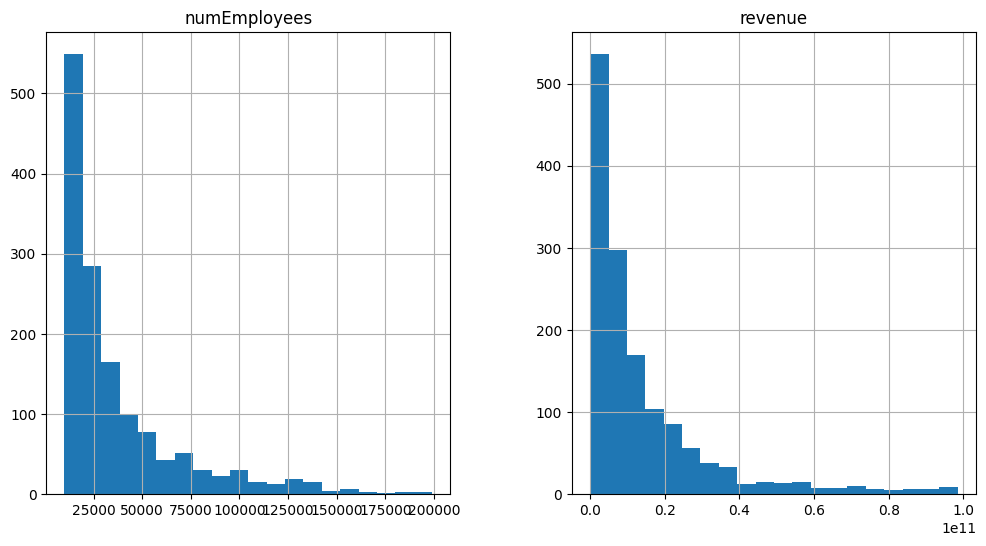

In [38]:
data.hist(bins=20, figsize=(12, 6))

## Conversion the RDFLib Graph to NetworkX for Basic Graph Analysis

We define functions for calculating basic node centralities from the graph, and displaying the graph.

In [39]:
def calculate_nodes_centrality(graph, centrality_type):
    if centrality_type == "closeness_centrality":
        centrality = nx.closeness_centrality(graph)
    elif centrality_type == "betweenness_centrality":
        centrality = nx.betweenness_centrality(graph)
    elif centrality_type == "degree_centrality":
        centrality = nx.degree_centrality(graph)
    else:
        raise NotImplementedError()

    sorted(centrality.items(), key=lambda x: x[1], reverse=True)
    return centrality

In [40]:
def display_graph(graph):
    pos = nx.spring_layout(graph, seed=557, k=0.8)
    plt.figure(figsize=(20, 20))
    nx.draw(
        graph,
        pos,
        with_labels=True,
        font_size=14,
        node_size=1000,
        node_color="lightblue",
        edge_color="gray",
        alpha=0.6,
    )
    plt.title("Knowledge Graph")

The function `rdflib_to_networkx_graph` converts the RDFLib graph into a NetworkX graph.

In [41]:
nx_graph = rdflib_to_networkx_graph(g)

Let's check how many connected components are there in the graph.

In [42]:
components = [c for c in nx.connected_components(nx_graph)]

In [43]:
len(components)

1

In [44]:
list(components[0])[:20]

[rdflib.term.Literal('-12.2', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#double')),
 rdflib.term.URIRef('http://dbpedia.org/resource/Vreme_(newspaper)'),
 rdflib.term.URIRef('http://finki.ukim.mk/'),
 rdflib.term.Literal('35', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),
 rdflib.term.URIRef('http://dbpedia.org/resource/Nova_Makedonija'),
 rdflib.term.Literal('SK', lang='en'),
 rdflib.term.URIRef('http://commons.wikimedia.org/wiki/Special:FilePath/Skopje_2014_-_Art_Bridge.jpg'),
 rdflib.term.URIRef('http://dbpedia.org/resource/Treblinka'),
 rdflib.term.Literal('北馬其頓首都', lang='zh'),
 rdflib.term.URIRef('http://dbpedia.org/resource/Dubrovnik'),
 rdflib.term.URIRef('http://dbpedia.org/resource/Modified_Mercalli_intensity_scale'),
 rdflib.term.URIRef('http://dbpedia.org/resource/Yugoslav_Partisans'),
 rdflib.term.URIRef('http://dbpedia.org/resource/Hapsburgs'),
 rdflib.term.Literal('MK-85'),
 rdflib.term.URIRef('http://dbpedia.org/resource/Fil

Now, we are going to sample a random subgraph from the entire graph in order to visualize it.

In [45]:
nodes = nx_graph.nodes()

In [46]:
random_nodes = sample(list(nodes), 15)

In [47]:
random_nodes

[rdflib.term.URIRef('http://dbpedia.org/resource/Water_table'),
 rdflib.term.URIRef('http://dbpedia.org/resource/Köppen_climate_classification'),
 rdflib.term.URIRef('http://dbpedia.org/resource/File:Coat_of_arms_of_Karpoš_Municipality.svg'),
 rdflib.term.URIRef('http://finki.ukim.mk/'),
 rdflib.term.URIRef('http://dbpedia.org/resource/Naissus'),
 rdflib.term.URIRef('http://dbpedia.org/resource/Young_Turks'),
 rdflib.term.URIRef('http://dbpedia.org/resource/Georgi_Konstantinovski'),
 rdflib.term.URIRef('http://dbpedia.org/resource/Pan-European_corridors'),
 rdflib.term.URIRef('http://dbpedia.org/resource/File:Coat_of_arms_of_Šuto_Orizari_Municipality.svg'),
 rdflib.term.URIRef('http://d-nb.info/gnd/1029195-7'),
 rdflib.term.URIRef('http://dbpedia.org/resource/Template:Lang-sr-Cyrl'),
 rdflib.term.Literal('Timeline of Skopje', lang='en'),
 rdflib.term.URIRef('http://dbpedia.org/resource/Template:Capitals_of_Bulgaria'),
 rdflib.term.URIRef('http://lb.dbpedia.org/resource/Skopje'),
 rdfli

We add Skopje to the nodes, since it's the main resource that we loaded in the graph and everything else is connected to it.

In [48]:
random_nodes.append(skopje)

In [49]:
graph_to_draw = nx_graph.subgraph(random_nodes)

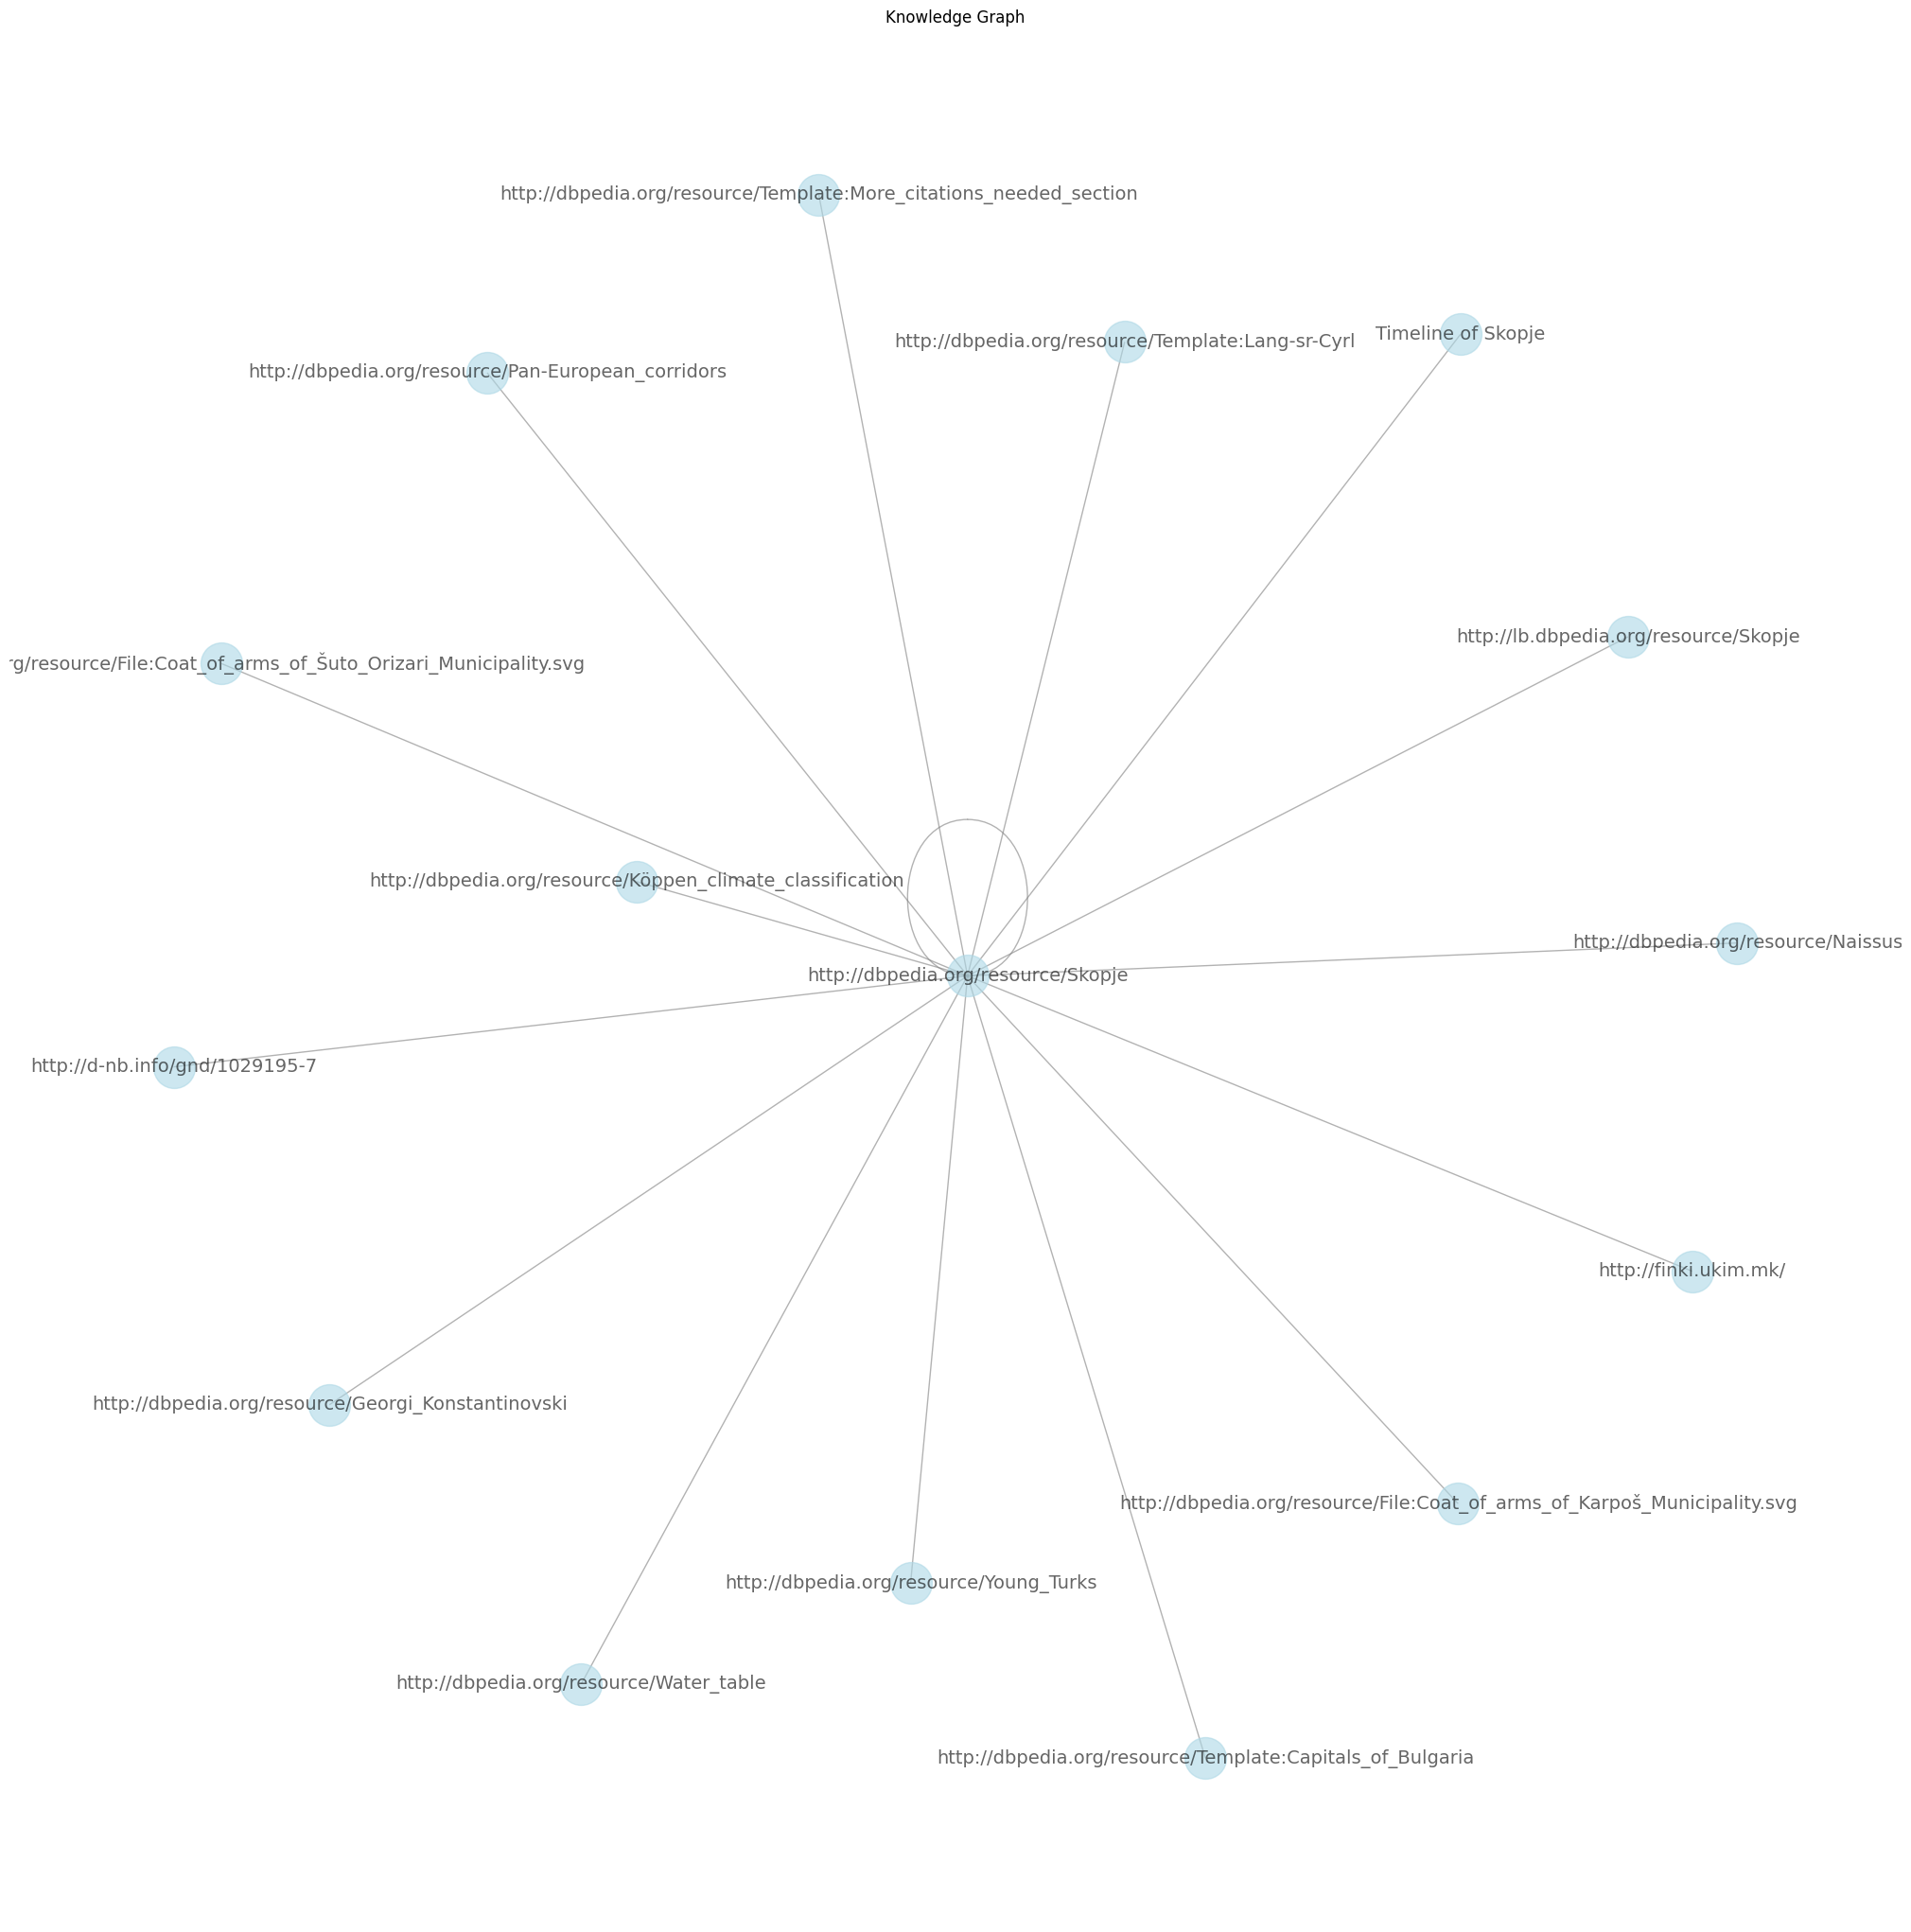

In [50]:
display_graph(graph_to_draw)

The nodes are of types `rdflib.term.URIRef` or `rdflib.term.Literal` depending on whether they are resources or literals.

In [51]:
random_nodes

[rdflib.term.URIRef('http://dbpedia.org/resource/Water_table'),
 rdflib.term.URIRef('http://dbpedia.org/resource/Köppen_climate_classification'),
 rdflib.term.URIRef('http://dbpedia.org/resource/File:Coat_of_arms_of_Karpoš_Municipality.svg'),
 rdflib.term.URIRef('http://finki.ukim.mk/'),
 rdflib.term.URIRef('http://dbpedia.org/resource/Naissus'),
 rdflib.term.URIRef('http://dbpedia.org/resource/Young_Turks'),
 rdflib.term.URIRef('http://dbpedia.org/resource/Georgi_Konstantinovski'),
 rdflib.term.URIRef('http://dbpedia.org/resource/Pan-European_corridors'),
 rdflib.term.URIRef('http://dbpedia.org/resource/File:Coat_of_arms_of_Šuto_Orizari_Municipality.svg'),
 rdflib.term.URIRef('http://d-nb.info/gnd/1029195-7'),
 rdflib.term.URIRef('http://dbpedia.org/resource/Template:Lang-sr-Cyrl'),
 rdflib.term.Literal('Timeline of Skopje', lang='en'),
 rdflib.term.URIRef('http://dbpedia.org/resource/Template:Capitals_of_Bulgaria'),
 rdflib.term.URIRef('http://lb.dbpedia.org/resource/Skopje'),
 rdfli

Let's take a look at the edges in the graph.

When the graph is converted from `rdflib` to `networkx`, the conversion sets two attributes on the edges: `weight` and `triples`. The `weight` attribute is set to `1` for each edge, and can be used to generate a weighted graph. The `triples` attribute containes the `(subject, predicate, object)` triples which describes the nodes being linked and the type of relation.

In [52]:
for n1, n2, attr in nx_graph.edges(data=True):
    print(n1, n2, attr)

http://dbpedia.org/resource/Skopje http://dbpedia.org/resource/Sopište_Municipality {'triples': [(rdflib.term.URIRef('http://dbpedia.org/resource/Skopje'), rdflib.term.URIRef('http://dbpedia.org/property/south'), rdflib.term.URIRef('http://dbpedia.org/resource/Sopište_Municipality')), (rdflib.term.URIRef('http://dbpedia.org/resource/Skopje'), rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'), rdflib.term.URIRef('http://dbpedia.org/resource/Sopište_Municipality'))], 'weight': 2}
http://dbpedia.org/resource/Skopje 395 {'triples': [(rdflib.term.URIRef('http://dbpedia.org/resource/Skopje'), rdflib.term.URIRef('http://dbpedia.org/property/quote'), rdflib.term.Literal('395', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')))], 'weight': 1}
http://dbpedia.org/resource/Skopje 7 {'triples': [(rdflib.term.URIRef('http://dbpedia.org/resource/Skopje'), rdflib.term.URIRef('http://dbpedia.org/property/julPrecipitationDays'), rdflib.term.Literal('7', datatype=r

We can add edges to the network by specifying the pair of nodes the edge would connect and some additional properties.

In [53]:
nx_graph.add_edge(
    random_nodes[1],
    random_nodes[2],
    weight=1,
    triples=[(random_nodes[1], "test_link", random_nodes[2])],
)

In [54]:
graph_to_draw = nx_graph.subgraph(random_nodes)

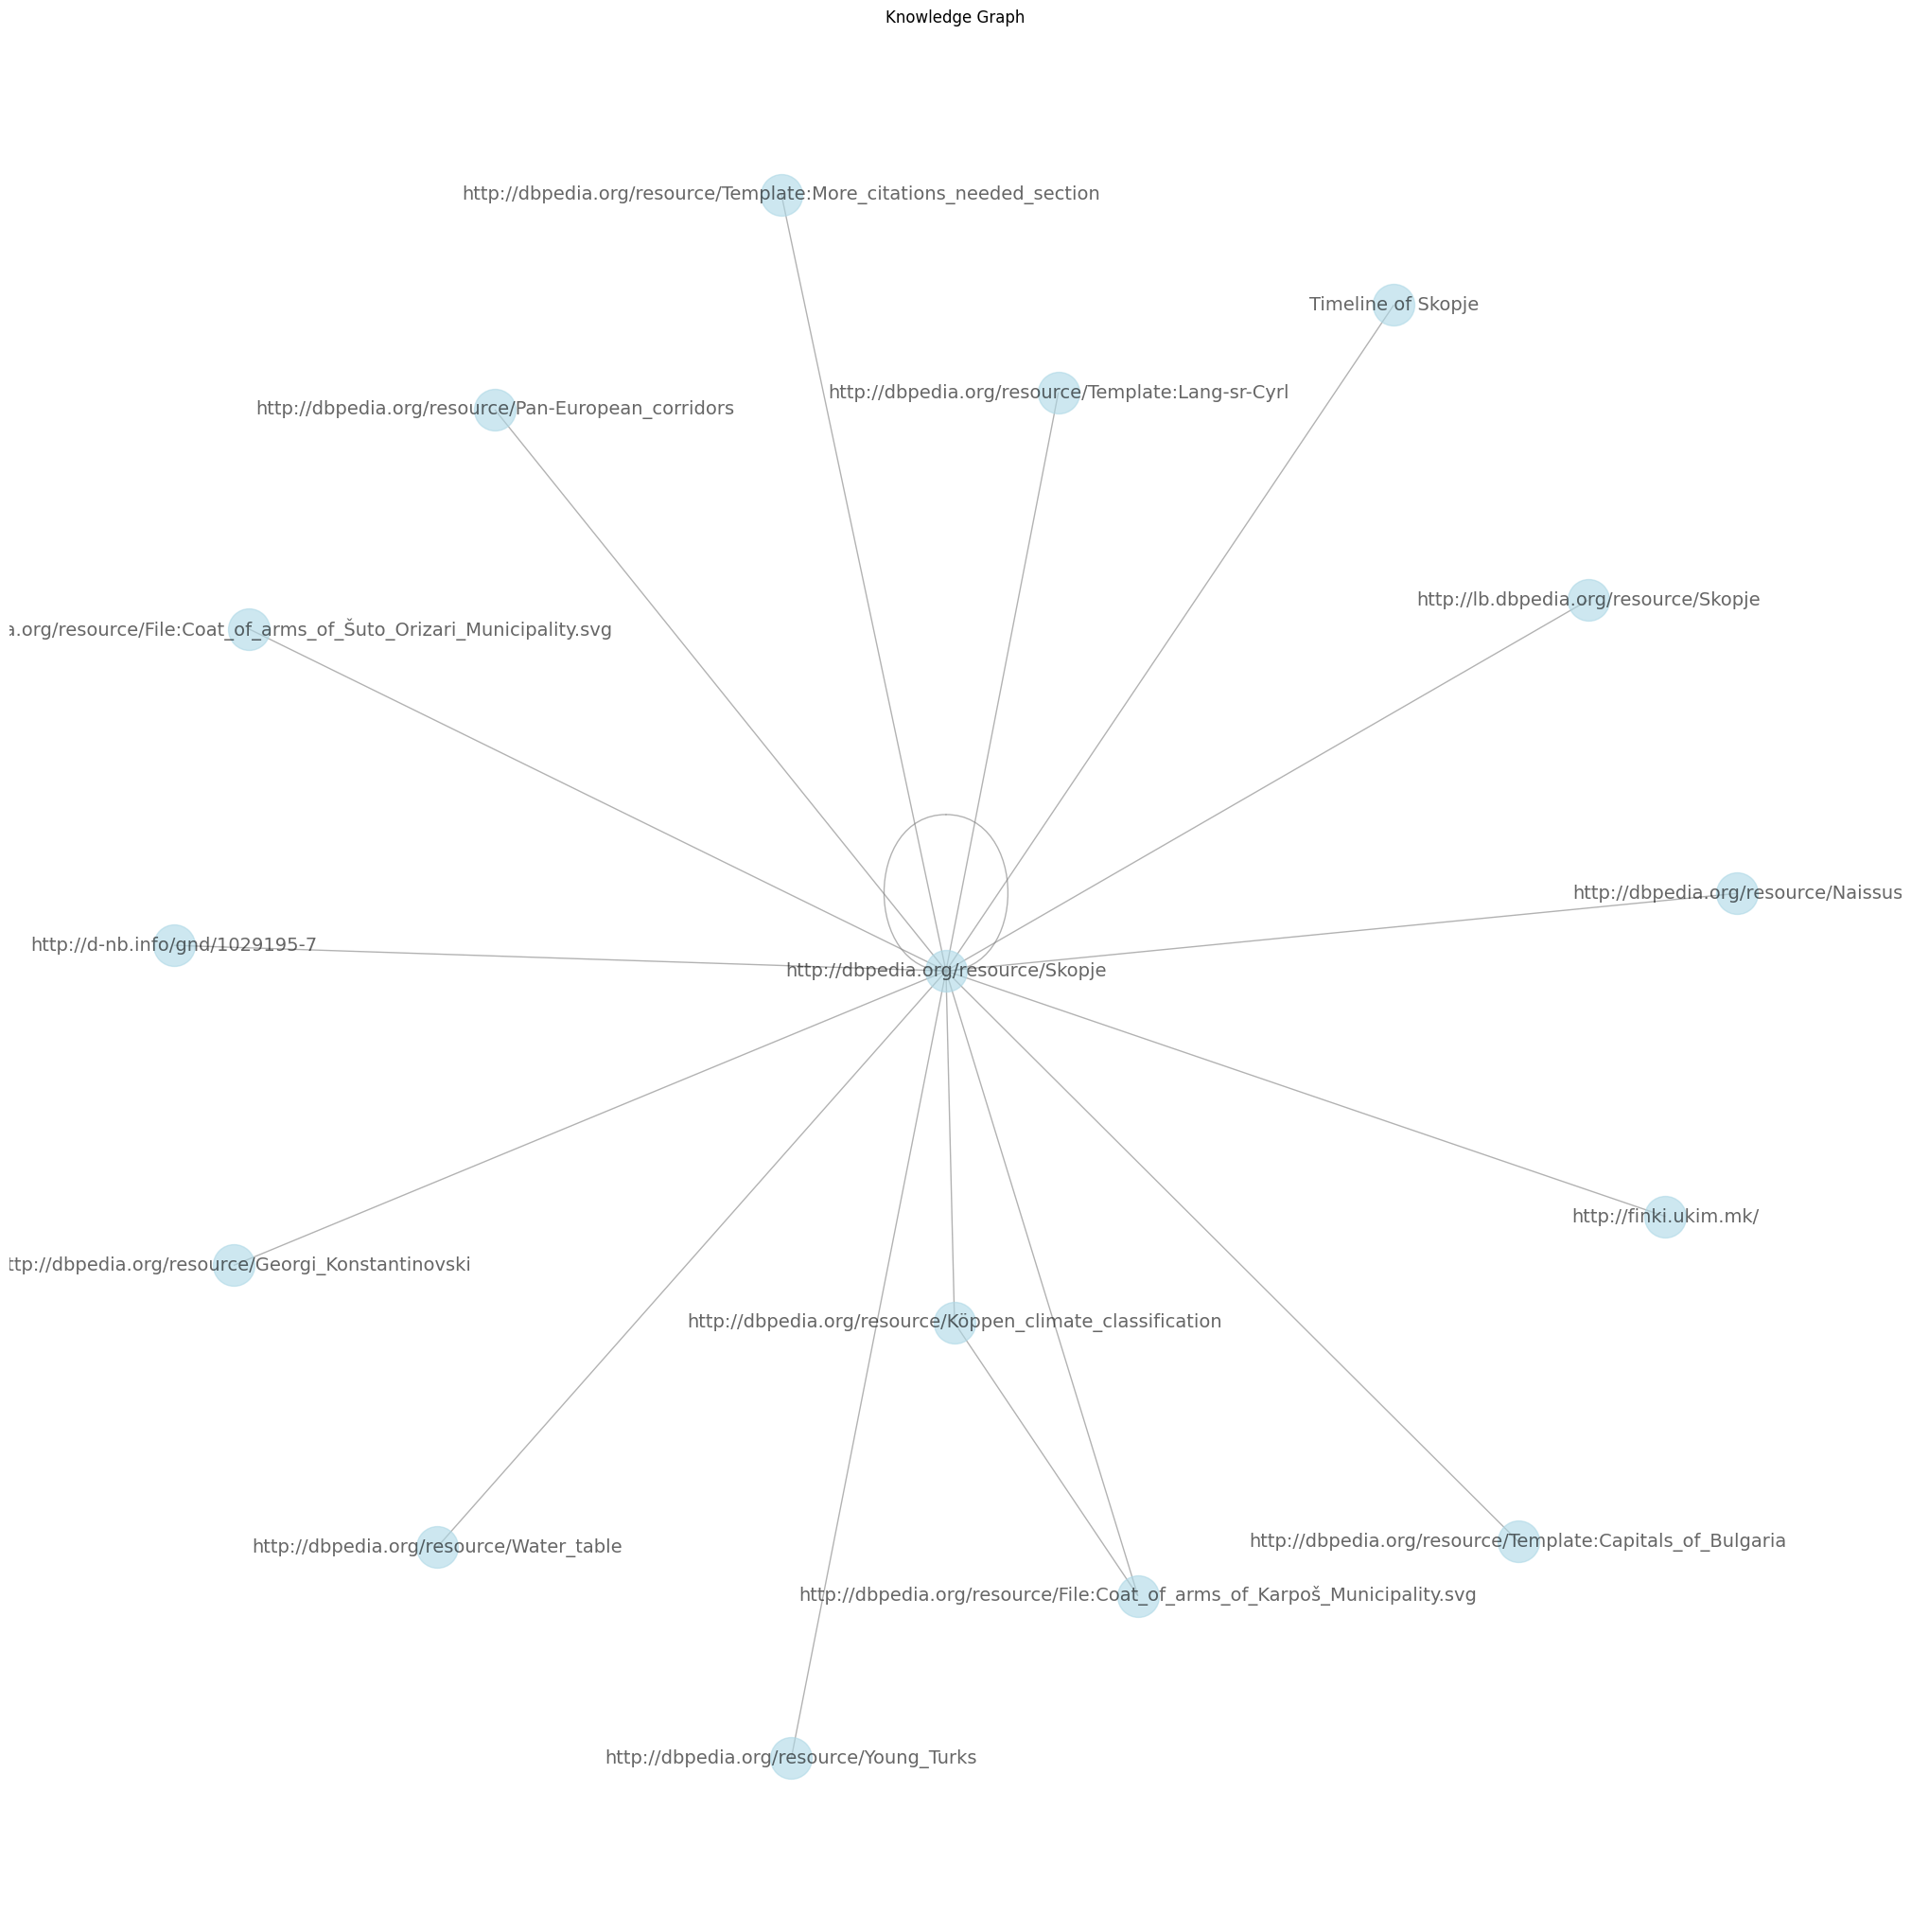

In [55]:
display_graph(graph_to_draw)

We can also add nodes to the graph.

In [56]:
hello = Literal("Hello")

In [57]:
nx_graph.add_node(hello)

We can calculate some basic statistics for the graph.

In [58]:
num_nodes = nx_graph.number_of_nodes()
num_edges = nx_graph.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Ratio edges to nodes: {round(num_edges / num_nodes, 2)}")

Number of nodes: 1160
Number of edges: 1160
Ratio edges to nodes: 1.0


**Definition**: Degree centrality measures the importance of a node based solely on the number of connections (links) it has.

In [59]:
degree_centrality = calculate_nodes_centrality(nx_graph, "degree_centrality")


for node, centrality in degree_centrality.items():
    print(f"{node}: Degree Centrality = {centrality:.2f}")

http://dbpedia.org/resource/Skopje: Degree Centrality = 1.00
http://dbpedia.org/resource/Sopište_Municipality: Degree Centrality = 0.00
395: Degree Centrality = 0.00
7: Degree Centrality = 0.00
1004: Degree Centrality = 0.00
http://dbpedia.org/resource/Category:Cities_in_North_Macedonia: Degree Centrality = 0.00
http://dbpedia.org/resource/Rumelia: Degree Centrality = 0.00
http://dbpedia.org/resource/File:Prvomajska_proslava_vo_Skopje,_1909.jpg: Degree Centrality = 0.00
http://dbpedia.org/resource/Adolf_Ciborowski: Degree Centrality = 0.00
http://dbpedia.org/resource/Gorno_Nerezi: Degree Centrality = 0.00
http://commons.wikimedia.org/wiki/Special:FilePath/Millennium_Cross_Vodno_2025_2.jpg: Degree Centrality = 0.00
http://dbpedia.org/resource/Template:Historical_populations: Degree Centrality = 0.00
Скоп'є: Degree Centrality = 0.00
Car plates: Degree Centrality = 0.00
столица Республики Северная Македония: Degree Centrality = 0.00
http://hy.dbpedia.org/resource/Սկոպիե: Degree Centrality

**Definition**: Betweenness centrality quantifies how often a node appears on the shortest paths between other nodes in the graph.

In [60]:
betweenness_centrality = calculate_nodes_centrality(nx_graph, "betweenness_centrality")

for node, centrality in betweenness_centrality.items():
    print(f"Betweenness Centrality of {node}: {centrality:.2f}")

Betweenness Centrality of http://dbpedia.org/resource/Skopje: 1.00
Betweenness Centrality of http://dbpedia.org/resource/Sopište_Municipality: 0.00
Betweenness Centrality of 395: 0.00
Betweenness Centrality of 7: 0.00
Betweenness Centrality of 1004: 0.00
Betweenness Centrality of http://dbpedia.org/resource/Category:Cities_in_North_Macedonia: 0.00
Betweenness Centrality of http://dbpedia.org/resource/Rumelia: 0.00
Betweenness Centrality of http://dbpedia.org/resource/File:Prvomajska_proslava_vo_Skopje,_1909.jpg: 0.00
Betweenness Centrality of http://dbpedia.org/resource/Adolf_Ciborowski: 0.00
Betweenness Centrality of http://dbpedia.org/resource/Gorno_Nerezi: 0.00
Betweenness Centrality of http://commons.wikimedia.org/wiki/Special:FilePath/Millennium_Cross_Vodno_2025_2.jpg: 0.00
Betweenness Centrality of http://dbpedia.org/resource/Template:Historical_populations: 0.00
Betweenness Centrality of Скоп'є: 0.00
Betweenness Centrality of Car plates: 0.00
Betweenness Centrality of столица Ре

Definition: Closeness centrality measures how close a node is to all other nodes in the network. It is calculated by summing the shortest path distances from the node to every other node, with nodes having smaller total distances receiving higher scores.

In [61]:
closeness_centrality = calculate_nodes_centrality(nx_graph, "closeness_centrality")

for node, centrality in closeness_centrality.items():
    print(f"Closeness Centrality of {node}: {centrality:.2f}")

Closeness Centrality of http://dbpedia.org/resource/Skopje: 1.00
Closeness Centrality of http://dbpedia.org/resource/Sopište_Municipality: 0.50
Closeness Centrality of 395: 0.50
Closeness Centrality of 7: 0.50
Closeness Centrality of 1004: 0.50
Closeness Centrality of http://dbpedia.org/resource/Category:Cities_in_North_Macedonia: 0.50
Closeness Centrality of http://dbpedia.org/resource/Rumelia: 0.50
Closeness Centrality of http://dbpedia.org/resource/File:Prvomajska_proslava_vo_Skopje,_1909.jpg: 0.50
Closeness Centrality of http://dbpedia.org/resource/Adolf_Ciborowski: 0.50
Closeness Centrality of http://dbpedia.org/resource/Gorno_Nerezi: 0.50
Closeness Centrality of http://commons.wikimedia.org/wiki/Special:FilePath/Millennium_Cross_Vodno_2025_2.jpg: 0.50
Closeness Centrality of http://dbpedia.org/resource/Template:Historical_populations: 0.50
Closeness Centrality of Скоп'є: 0.50
Closeness Centrality of Car plates: 0.50
Closeness Centrality of столица Республики Северная Македония: 0